In [103]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

In [210]:
def partial_sum(input_list):
    """
    This function returns an array output where output[i] is the sum of all input numbers except input[i] 
    """
    output = []
    for ii in range(len(input_list)):
        output.append(sum(input_list[:ii] + input_list[ii+1:]))
    return output

In [215]:
assert partial_sum([1,2,3,4]) == [9,8,7,6]
assert partial_sum([2,9,5,5,1]) == [20,13,17,17,21]

# Question 2

In [206]:
# I am only interested in the 'jobpost' column
postings = pd.read_csv("job_posts.csv", usecols=["jobpost"])["jobpost"]

In [49]:
postings.head()

0    AMERIA Investment Consulting Company\r\nJOB TI...
1    International Research & Exchanges Board (IREX...
2    Caucasus Environmental NGO Network (CENN)\r\nJ...
3    Manoff Group\r\nJOB TITLE:  BCC Specialist\r\n...
4    Yerevan Brandy Company\r\nJOB TITLE:  Software...
Name: jobpost, dtype: object

In [220]:
print(postings[0])

AMERIA Investment Consulting Company
JOB TITLE:  Chief Financial Officer
POSITION LOCATION: Yerevan, Armenia
JOB DESCRIPTION:   AMERIA Investment Consulting Company is seeking a
Chief Financial Officer. This position manages the company's fiscal and
administrative functions, provides highly responsible and technically
complex staff assistance to the Executive Director. The work performed
requires a high level of technical proficiency in financial management
and investment management, as well as management, supervisory, and
administrative skills.
JOB RESPONSIBILITIES:  
- Supervises financial management and administrative staff, including
assigning responsibilities, reviewing employees' work processes and
products, counseling employees, giving performance evaluations, and
recommending disciplinary action;
- Serves as member of management team participating in both strategic
and operational planning for the company;
- Directs and oversees the company's financial management activities,
in

The jobposts seem to have the same structure for each entry. New "headers" are printed in all capital letters, followed by a colon. Most entries place headers on a new line but some do not. The steps to identify and extract the headers are as follows:

1. Search for all fully capitalized headers at the beginning of lines. This serves to identify variants, e.g. 'TITLE' vs. 'JOB TITLE'.
2. Identify headers relevant to the information I want to extract and form groups of similar headers.
3. Search for those specific headers but without the constraint that they must be at the beginning of a line. This ensures that fewer job postings are skipped due to unexpected formatting.
4. Explore outliers.

## Step 1

In [245]:
# Extract all capitalized headers in the job postings that start on a new line
headers = [re.findall(pattern="\n([A-Z /]+):", string=entry) for entry in postings]

In [248]:
# Look at all unique headers
all_headers = set([item for sublist in headers for item in sublist])
for header in sorted(all_headers):
    print(header)

ABOUT
ABOUT CHAMPIONSHIP
ABOUT COMPANY
ABOUT PROGRAM
ABOUT PROGRAM/ PROJECT
ABOUT PROJECT
ABOUT THE SPEAKER
ADDITIONAL CHARACTERISTICS
ADDITIONAL COMPETENCIES
ADDITIONAL DESIRED CHARACTERISTICS
ADDITIONAL NOTES
ADDITIONAL RESPONSIBILITIES
ADDITIONAL SELECTION CRITEREA
ADDITIONAL SELECTION CRITERIA
ADMINISTRATIVE DUTIES
AEFM
ANNOUNCEMENT CODE
ANNOUNCEMENT NUMBER
APPLICATION DEADLINE
APPLICATION PROCEDURES
ATTACHMENTS
AUTHOR
BACKGROUND
BASIC FUNCTION OF THE POSITION
COMMUNICATIONS
COMPETENCIES
CONTACT INFORMATION
CORPORATE COMPETENCIES
COURSE OVERVIEW
CRITERIA
DATE/ TIME
DEFINITION
DEFINITIONS
DESCRIPTION
DESIRABLE COMPETENCIES
DESIRABLE EXPERIENCE
DESIRABLE QUALIFICATIONS
DESIRED QUALIFICATION
DESIRED QUALIFICATIONS
DESIRED SKILLS
DESIRED SKILLS AND KNOWLEDGE
DETAIL DESCRIPTION
DISTINGUISHING FEATURES
DNS
DOMAIN KNOWLEDGE
DURATION
EDUCATION TYPE
EDUCATION/ EXPERIENCE
EDUCATIONAL LEVEL
EFM/MOH/NOR
ELIGIBILITY
ENROLLMENT
ESSENTIAL SPECIALIZED SKILLS/ KNOWLEDGE/ COMPETENCIES
EU CONTRACT NU

I can ensure that my approach is suitable by showing that most of the job postings are in the format I expect. The following barplot shows the number of headers per job posting. The vast majority of job postings adhere to this format, i.e. capitalized headers at the beginning of lines, followed by a colon.

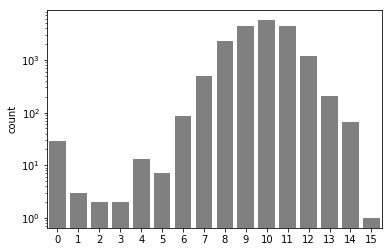

In [166]:
sns.countplot([len(x) for x in headers], color="grey")
plt.yscale("log")

In [174]:
print("{:.2f}% of job postings have at least 5 headers as defined above.".format(
    sum([len(x) > 5 for x in headers]) * 100 / len(headers)))

99.71% of job postings have at least 5 headers as defined above.


## Step 2
The next step requires some manual work to find symonyms for the information I'm interested in extracting from the jobposts column:

1. Job Title: 
    - `JOB TITLE`
    - `TITLE`
2. Position Duration:
    - `POSITION DURATION`
    - `DURATION`
3. Position Location:
    - `POSITION LOCATION`
    - `LOCATION`
4. Job Description
    - `JOB DESCRIPTION`
    - `NKRJOB DESCRIPTION`
    - `DESCRIPTION`
5. Job Responsibilities
    - `RESPONSIBILITIES`
    - `JOB RESPONSIBILITIES`
6. Required Qualifactions
    - `REQUIRED QUALIFICATIONS`
    - `DESIRED QUALIFICATION`
    - `PREFERRED QUALIFICATIONS`
    - `DESIRABLE QUALIFICATIONS`
    - `DESIRED QUALIFICATIONS`
    - `DESIRABLE COMPETENCIES`
    - `KEY COMPETENCIES`
    - `COMPETENCIES`
    - `ESSENTIAL SPECIALIZED SKILLS/ KNOWLEDGE/ COMPETENCIES`
    - `CORPORATE COMPETENCIES`
    - `FUNCTIONAL COMPETENCIES`
    - `ADDITIONAL COMPETENCIES`
    - Special note: Qualifications is a very variable field. Many entries also contain sections on desired qualifications and "nice-to-haves". In general, if an entry has the field `REQUIRED QUALIFICATIONS`, then the others should be ignored. Only if it is missing should the others be used.
7. Remuneration
    - `REMUNERATION/ SALARY`
    - `REMUNERATION`
    - `SALARY`
8. Application Deadline
    - `APPLICATION DEADLINE`
9. About Company
    - `ABOUT COMPANY`
    - `ABOUT`

In [372]:
[header for header in all_headers if "ABOUT" in header]

['ABOUT COMPANY',
 'ABOUT THE SPEAKER',
 'ABOUT CHAMPIONSHIP',
 'ABOUT PROGRAM/ PROJECT',
 'ABOUT',
 'ABOUT PROJECT',
 'ABOUT PROGRAM']

In [370]:
tmp = [
    postings[ii] for ii in range(len(postings)) if 
    len(re.findall("ABOUT", " ".join(headers[ii]))) > 1]
print(len(tmp))

537


In [373]:
tmp = [
    postings[ii] for ii in range(len(postings)) if 
    "ABOUT" in headers[ii]]
print(len(tmp))

1012


In [374]:
print(tmp[0])

OSI International Higher Education Support Program (HESP)
TITLE:  Country Coordinators Russia, Azerbaijan, Armenia
LOCATION:  Country Office
JOB DESCRIPTION:  Country Coordinators will report directly to the
Region Managers. They will be responsible for the management and
implementation of the fellowship programs and projects in their target
countries: for coordinating all recruitment, selection, placement
procedures; university relations; strategy evelopment; program,
administrative and financial matters.
JOB RESPONSIBILITIES:  Essential duties may include, but are not limited
to the following: 
- Communicate effectively with the head office and Region Manager on
program strategy, financial and reporting policies and obligations; 
- Be responsible for the implementation of all aspects of the program in
their respective country; 
- Organize orientation and placement of program international fellows,
support their activities; 
- Organize recruitment, interviewing, selection and placemen